In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pandas_datareader pandas
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as web
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
exog_var = pd.read_csv('/content/gdrive/MyDrive/combined_data.csv', index_col='DATE', parse_dates=True)
exog_var.drop(exog_var.tail(2).index, inplace = True)
exog_var.tail()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,...,DGS10,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR,CBOE SP500 Call Volume,CBOE SP500 Put Volume
DATE,,,,,,,,,,,,,,,,,,,,,
2023-02-01,0.024229,0.032357,0.027130,-0.026112,-0.041933,-0.005987,0.058824,-0.012365,0.031632,0.082104,...,0.060978,-0.007980,0.002107,0.003700,0.163968,0.032000,0.095238,0.054333,-0.016325,0.032322
2023-03-01,0.008602,-0.074627,-0.022504,0.035052,0.018907,-0.006213,-0.027778,-0.019406,0.024464,-0.030092,...,-0.022365,-0.003727,0.013109,0.000530,-0.187175,0.010336,0.107551,0.019228,0.068763,0.071659
2023-04-01,0.049041,0.024194,-0.008194,0.014642,0.024764,-0.000599,-0.028571,-0.018148,-0.046412,-0.074926,...,-0.055430,-0.006567,0.013938,0.003678,-0.130659,0.023018,-0.020661,0.038030,-0.074947,-0.082041
2023-05-01,0.044715,-0.067717,0.026065,0.002482,-0.034896,-0.012604,0.088235,-0.001344,0.034575,0.015370,...,0.032843,-0.009278,0.013133,0.001241,0.003924,0.028750,-0.030591,0.044702,0.050325,0.010791
2023-06-01,0.003891,0.087838,-0.013516,0.064727,0.045561,0.000938,-0.027027,-0.003387,0.026221,0.099728,...,0.048818,0.003830,0.009479,0.001804,0.597022,0.002430,0.117519,0.005907,0.304119,0.197909


In [ ]:
#combined_data.drop(columns = ['BAMLC0A4CBBBEY','BAMLC0A4CBBB','CSUSHPINSA','EFFR'], axis=1, inplace=True)

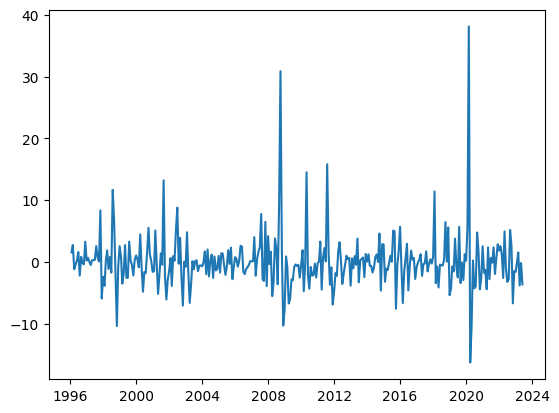

In [ ]:
vix = pd.read_csv('/content/gdrive/MyDrive/VIXCLS.csv', index_col='DATE', parse_dates=True)
vix = vix.drop(vix.index[-1])
vix_data = vix['VIXCLS']
vix['VIXCLS'] = vix['VIXCLS'].diff()
vix.drop(vix.tail(2).index, inplace = True)
#vix_data.drop(vix_data.tail(2).index, inplace = True)
vix.tail()
plt.plot(vix)

In [ ]:
!pip install statsmodels
!pip install arch

In [ ]:
combined_data = exog_var.copy()
combined_data['VIX'] = vix
combined_data = combined_data.drop(combined_data.index[-1])
combined_data.drop(combined_data.tail(2).index, inplace = True)
combined_data.tail()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,...,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR,CBOE SP500 Call Volume,CBOE SP500 Put Volume,VIX
DATE,,,,,,,,,,,,,,,,,,,,,
2022-11-01,0.115591,-0.051753,-0.050031,0.053753,0.056726,-0.007183,-0.027027,-0.006687,-0.038037,-0.029320,...,0.000172,-0.006042,0.002050,0.564496,0.112000,0.055114,0.219156,-0.146928,-0.076491,-6.706623
2022-12-01,0.024096,0.051056,-0.022935,-0.058971,-0.041704,-0.019988,-0.027778,-0.007223,-0.067503,-0.071807,...,0.001967,-0.008436,0.001313,0.097765,0.046043,-0.008941,0.089722,0.000041,-0.015547,-1.514805
2023-01-01,0.068235,0.087102,-0.013717,0.061753,0.028322,0.009035,-0.028571,-0.013375,-0.033908,-0.032220,...,-0.006150,-0.005329,0.005171,0.005382,0.031637,-0.052707,0.058187,0.049965,0.028601,-1.615238
2023-02-01,0.024229,0.032357,0.027130,-0.026112,-0.041933,-0.005987,0.058824,-0.012365,0.031632,0.082104,...,-0.007980,0.002107,0.003700,0.163968,0.032000,0.095238,0.054333,-0.016325,0.032322,-0.048548
2023-03-01,0.008602,-0.074627,-0.022504,0.035052,0.018907,-0.006213,-0.027778,-0.019406,0.024464,-0.030092,...,-0.003727,0.013109,0.000530,-0.187175,0.010336,0.107551,0.019228,0.068763,0.071659,1.523848


<Axes: >

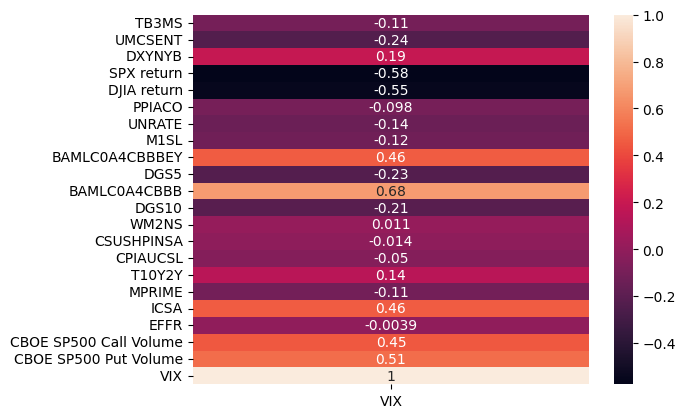

In [ ]:
corr_matrix = combined_data.corr()
sns.heatmap(corr_matrix[['VIX']], annot=True)

<Axes: >

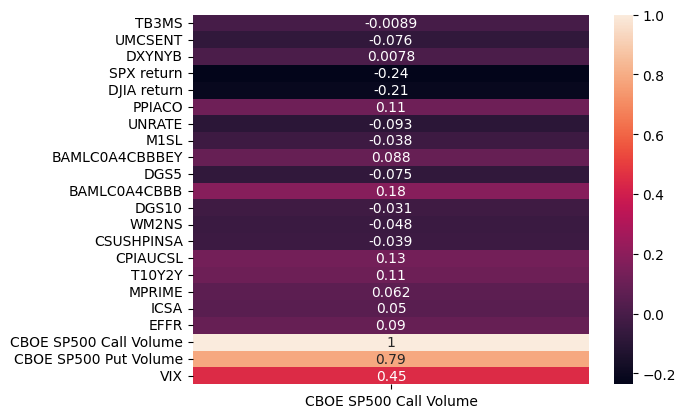

In [ ]:
sns.heatmap(corr_matrix[['CBOE SP500 Call Volume']], annot=True)

In [ ]:
print(exog_var.shape)
print(vix.shape)
print(vix_data.shape)

(330, 21)
(330, 1)
(332,)


In [ ]:
!pip install statsmodels
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

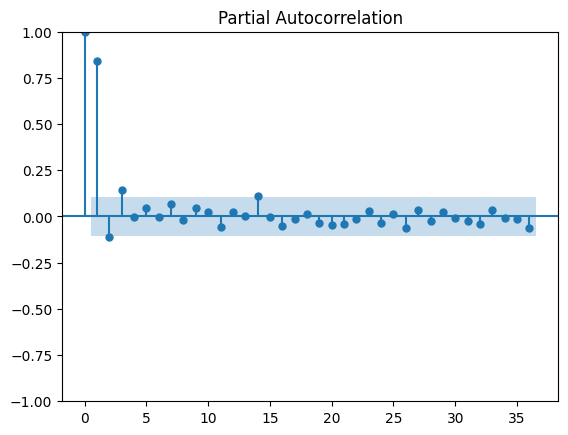

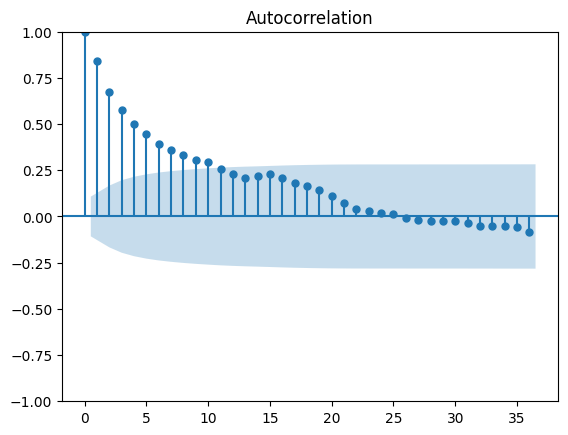

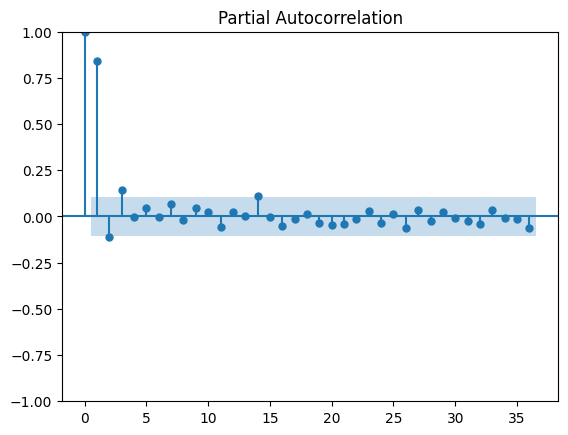

In [ ]:
plot_acf(vix_data, lags = 36)
plot_pacf(vix_data, lags = 36)

# Dickey Fuller Test

In [ ]:
# Perform Dickey-Fuller test
result = adfuller(vix_data)

# Extract and print the results
print('Dickey-Fuller Test Results:')
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Number of Lags Used: {result[2]}')
print(f'Number of Observations Used: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

# Checking to see if differencing is needed
if result[1] <= 0.05:
    print('Result: Reject the null hypothesis. Data is stationary and no differencing is needed')
else:
    print('Result: Fail to reject the null hypothesis. Data is non-stationary and differencing is needed')

Dickey-Fuller Test Results:
Test Statistic: -4.670414879930406
p-value: 9.560742156141317e-05
Number of Lags Used: 2
Number of Observations Used: 329
Critical Values:
1%: -3.4503836022181056
5%: -2.8703653471616826
10%: -2.571471939191249
Result: Reject the null hypothesis. Data is stationary and no differencing is needed


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
def fit_predict(X, y):
    x_train, x_test = train_test_split(X, train_size=0.8)
    y_train, y_test = train_test_split(y, train_size=0.8)

    #model
    arima_model = pm.arima.auto_arima(y=y_train, X=x_train, start_p=1, start_q=1,max_p=9,max_d=9,max_q=9, seasonal=False, suppress_warnings=True, stepwise=True, trace=True, out_of_sample_size=10, error_action='ignore')
    print(arima_model.summary())
    garch_model = arch_model(arima_model.resid(), vol='Garch', p=2, q=1, x=x_train)
    result = garch_model.fit()
    print(result.summary())
    predicted_mu, confit = arima_model.predict(n_periods=y_test.shape[0], return_conf_int=True, X=x_test)

    # Use GARCH to predict the residuals
    garch_forecast = result.forecast(start = y_test.shape[0])
    x_1 = np.sqrt(garch_forecast.variance)
    print(x_1.mean)
    predicted_et = garch_forecast.mean['h.1'].iloc[-1]
    print(predicted_et)
    prediction = predicted_mu + predicted_et

    mse = mean_squared_error(y_test, prediction)
    print("MSE: ", mse)
    cf = pd.DataFrame(confit)

    prediction_series = pd.Series(prediction,index=y_test.index)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(prediction_series, label = "Test Prediction")
    ax.fill_between(prediction_series.index,cf[0],cf[1],color='grey',alpha=.3)
    plt.legend()
    fig = plt.gcf()
    fig.savefig('fig1.png')
    plt.show()



    arima_model.plot_diagnostics(figsize=(14,10))
    plt.show()

In [ ]:
def mda(actual, predicted):
    """
    Calculates the Mean Directional Accuracy (MDA) for two time series.

    Parameters:
    actual (array-like): The actual values for the time series.
    predicted (array-like): The predicted values for the time series.

    Returns:
    float: The MDA value.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # calculate the signs of the differences between consecutive values
    actual_diff = np.diff(actual)
    actual_signs = np.sign(actual_diff)
    predicted_diff = np.diff(predicted)
    predicted_signs = np.sign(predicted_diff)

    # count the number of times the signs are the same
    num_correct = np.sum(actual_signs == predicted_signs)

    # calculate the MDA value
    mda = num_correct / (len(actual) - 1)

    return mda

In [ ]:
def fit_predict(X, y):
    x_train, x_test = train_test_split(X, train_size=0.80)
    y_train, y_test = train_test_split(y, train_size=0.80)

    #model
    arima_model = pm.arima.auto_arima(y=y_train, X=x_train, start_p=1, start_q=1,max_p=9,max_d=9,max_q=9, seasonal=False, suppress_warnings=True, stepwise=True, trace=True, out_of_sample_size=10, error_action='ignore')
    #print(arima_model.summary())
    garch_model = arch_model(arima_model.resid(), vol='Garch', p=2, q=1, x=x_train)
    result = garch_model.fit()
    print(result.summary())
    #prediction, confit = model.predict(n_periods=y_test.shape[0], return_conf_int=True, X=x_test)
    predicted_mu, confit = arima_model.predict(n_periods=y_test.shape[0], return_conf_int=True, X=x_test)
    # Use GARCH to predict the residuals
    garch_forecast = result.forecast(start = y_test.shape[0])
    x_1 = np.sqrt(garch_forecast.variance)
    print(x_1.mean)
    #print(garch_forecast.mean)
    #predicted_et = x_1.mean
    predicted_et = garch_forecast.mean['h.1'].iloc[-1]
    print(predicted_et)
    prediction = predicted_mu + predicted_et

    mse = mean_squared_error(y_test, prediction)
    print("MSE: ", mse)
    r2 = r2_score(y_test, prediction)
    print("Test r2-score:", r2)
    mpe = mean_absolute_percentage_error(y_test, prediction)
    print("Test MAPE:", mpe)

    cf = pd.DataFrame(confit)
    prediction_series = pd.Series(prediction, index=y_test.index)

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    # Plotting real data in blue
    ax.plot(y.index, y, label='VIX', color='blue')

    # Plotting train prediction in orange
    #train_prediction = np.sqrt(result.conditional_volatility)
    #ax.plot(y_train.index, train_prediction, label='Train Prediction', color='orange')

    # Plotting test prediction in green
    ax.plot(prediction_series.index, prediction, label='Test Prediction', color='green')

    ax.fill_between(prediction_series.index, cf[0], cf[1], color='grey', alpha=.3)

    ax.set_xlim([y_train.index[-1], y.index[-1]])

    # Adding legends
    ax.legend()

    plt.show()

In [ ]:
fit_predict(exog_var[56:330], vix[56:330])

In [ ]:
selected_features = exog_var[['BAMLC0A4CBBB', 'SPX return', 'UMCSENT', 'DGS10', 'CBOE SP500 Put Volume']]
#selected_features = exog_var[['BAMLC0A4CBBB', 'SPX return', 'UNRATE', 'ICSA', 'CBOE SP500 Put Volume']]
selected_features.tail()

In [ ]:
print(selected_features.shape)
print(vix.shape)
print(vix_data.shape)

(330, 5)
(330, 1)
(332,)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1146.747, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1145.740, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1147.442, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1147.354, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1146.977, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.043 seconds
Iteration:      1,   Func. Count:      7,   Neg. LLF: 864.8675694890275
Iteration:      2,   Func. Count:     15,   Neg. LLF: 569.4260076547305
Iteration:      3,   Func. Count:     23,   Neg. LLF: 565.7560763096366
Iteration:      4,   Func. Count:     30,   Neg. LLF: 561.3168175035755
Iteration:      5,   Func. Count:     37,   Neg. LLF: 557.7426978454713
Iteration:      6,   Func. Count:     43,   Neg. LLF: 557.7410454524326
Iteration:      7,   Func. Count:     49,   Neg. LLF: 557.7369271296517
Iteration:      8,   Func. Count:     55,   Ne

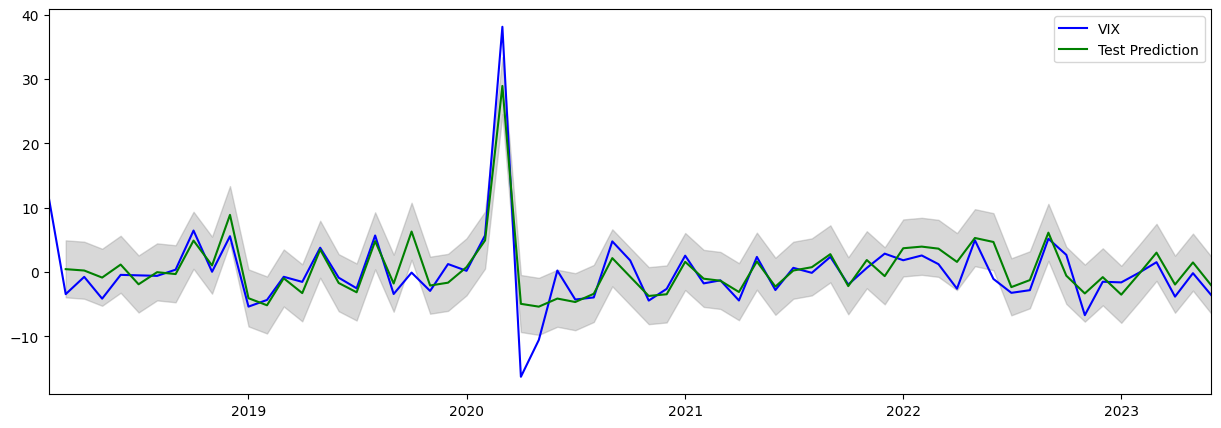

In [ ]:
fit_predict(selected_features[13:], vix[13:]) #, vix_data[12:])